### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 5


### Дисциплина: Методы машинного обучения

## Москва 2022
***

### Вариант № 23

# 1. При помощи модуля `pandas_datareader` считайте котировки указанной в индивидуальным задании акции за указанный период времени. 

In [1]:
import yfinance as yfin
from keras import backend as K
import tensorflow as tf
from pandas_datareader import data as pdr
import datetime as dt
yfin.pdr_override()
Anaida = pdr.get_data_yahoo('UAL',start=dt.datetime(2020, 1, 1),end=dt.datetime(2022, 1, 1))
print (Anaida.head())
Anaida.tail()

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2019-12-31  87.709999  88.459999  87.709999  88.089996  88.089996  2073700
2020-01-02  89.570000  90.570000  89.110001  89.739998  89.739998  2769800
2020-01-03  86.800003  88.160004  86.260002  87.900002  87.900002  3562900
2020-01-06  86.720001  88.070000  86.650002  87.699997  87.699997  2652700
2020-01-07  87.410004  88.160004  86.739998  86.769997  86.769997  2581300


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-27,43.560001,44.779999,43.080002,44.580002,44.580002,11239300
2021-12-28,44.320000,45.799999,44.049999,45.270000,45.270000,9256200
2021-12-29,44.820000,45.169998,44.330002,44.430000,44.430000,8341000
2021-12-30,44.290001,45.200001,44.070000,44.130001,44.130001,9854600
2021-12-31,44.139999,44.709999,43.720001,43.779999,43.779999,7398900


# 2. Визуализируйте котировки акции (столбец `Adj Close`) за весь период на графике. Подпишите оси и рисунок.

Text(0, 0.5, 'Y')

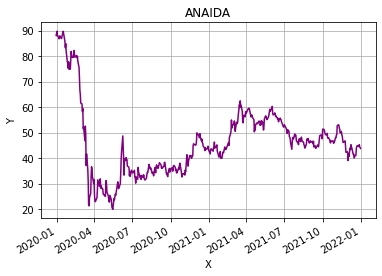

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
Anaida['Adj Close'].plot.line(grid=True,title='ANAIDA', color='purple');
plt.xlabel('X')
plt.ylabel('Y')

# 3. Вычислите и визуализируйте заданный показатель акции в соответствии с индивидуальным заданием.

Text(0, 0.5, 'Y')

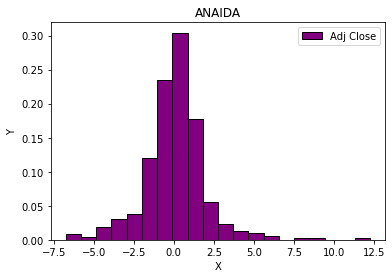

In [3]:
(Anaida[['Adj Close']].shift(1) - Anaida[['Adj Close']]).plot.hist(color='purple', edgecolor='black', bins=20, density=True);
plt.xlabel('X')
plt.title('ANAIDA')
plt.ylabel('Y')

# 4.	Сформируйте обучающую, тестовую и валидационные выборки для обучения нейронной сети в соответствии с индивидуальным заданием. 

In [4]:
y = Anaida['Adj Close']
data = Anaida.drop(['Adj Close'],axis=1)
num_train_samples = int(0.5 * len(data))
num_val_samples = int(0.25 * len(data))
num_test_samples = len(data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)
mean = data[:num_train_samples].mean(axis=0)
data -= mean
std = data[:num_train_samples].std(axis=0)
data /= std
sampling_rate = 1
sequence_length = 40
delay = sampling_rate * (sequence_length + 10 - 1)
batch_size = 16
train_dataset = tf.keras.utils.timeseries_dataset_from_array(data[:-delay],targets=y[delay:],sampling_rate=sampling_rate,sequence_length=sequence_length,shuffle=True,batch_size=batch_size,start_index=0,end_index=num_train_samples)
val_dataset = tf.keras.utils.timeseries_dataset_from_array(data[:-delay],targets=y[delay:],sampling_rate=sampling_rate,sequence_length=sequence_length,shuffle=True,batch_size=batch_size,start_index=num_train_samples,end_index=num_train_samples + num_val_samples)
test_dataset = tf.keras.utils.timeseries_dataset_from_array(data[:-delay],targets=y[delay:],sampling_rate=sampling_rate,sequence_length=sequence_length,shuffle=True,batch_size=batch_size,start_index=num_train_samples + num_val_samples)

num_train_samples: 253
num_val_samples: 126
num_test_samples: 127


# 5.	Постройте нейронную сеть MLP с нормализующим слоем и одним плотным скрытым слоем из 16 нейронов для прогнозирования стоимости акции и обучите ее на обучающей выборке. Оцените качество прогнозирования при помощи заданного показателя качества на тестовой выборке.

In [5]:
inputs = tf.keras.Input(shape=(sequence_length, data.shape[-1]))
x = tf.keras.layers.Normalization()(inputs)

x = tf.keras.layers.Dense(16, activation="relu")(x)
outputs = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop", loss="mse", metrics=['mae'])

_1 = model.fit(train_dataset,epochs=100,validation_data=val_dataset,) 

Epoch 1/100
14/14 [==============================] - 1s 31ms/step - loss: 1288.1449 - mae: 35.2705 - val_loss: 3086.9138 - val_mae: 55.4659
Epoch 2/100
14/14 [==============================] - 0s 11ms/step - loss: 1272.0585 - mae: 35.0404 - val_loss: 3072.4673 - val_mae: 55.3356
Epoch 3/100
14/14 [==============================] - 0s 11ms/step - loss: 1258.8373 - mae: 34.8488 - val_loss: 3058.8271 - val_mae: 55.2123
Epoch 4/100
14/14 [==============================] - 0s 11ms/step - loss: 1246.1427 - mae: 34.6666 - val_loss: 3045.4500 - val_mae: 55.0910
Epoch 5/100
14/14 [==============================] - 0s 12ms/step - loss: 1233.9871 - mae: 34.4886 - val_loss: 3032.4487 - val_mae: 54.9728
Epoch 6/100
14/14 [==============================] - 0s 10ms/step - loss: 1221.7078 - mae: 34.3111 - val_loss: 3018.9031 - val_mae: 54.8494
Epoch 7/100
14/14 [==============================] - 0s 12ms/step - loss: 1209.5068 - mae: 34.1318 - val_loss: 3006.5762 - val_mae: 54.7368
Epoch 8/100
14/14 [=

In [6]:
print(f"TEST MAE: {model.evaluate(test_dataset)[1]:.2f}")

3/3 [==============================] - 0s 5ms/step - loss: 1030.8942 - mae: 32.0285
TEST MAE: 32.03


In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40, 5)]           0         
                                                                 
 normalization (Normalizatio  (None, 40, 5)            11        
 n)                                                              
                                                                 
 dense (Dense)               (None, 40, 16)            96        
                                                                 
 dense_1 (Dense)             (None, 40, 1)             17        
                                                                 
Total params: 124
Trainable params: 113
Non-trainable params: 11
_________________________________________________________________


# 6.	Примените указанную в индивидуальном задании технику решения проблемы исчезающих градиентов и постройте нейронную сеть MLP с нормализующим слоем и тремя плотными скрытыми слоями из 16 нейронов для прогнозирования стоимости акции и обучите ее на обучающей выборке. Оцените качество прогнозирования при помощи заданного показателя качества для тестовой выборки.

In [8]:
inputs = tf.keras.Input(shape=(sequence_length, data.shape[-1]))
x = tf.keras.layers.Normalization()(inputs)

x = tf.keras.layers.Dense(16, kernel_initializer='lecun_normal',
                                 activation='selu')(x)

x = tf.keras.layers.Dense(16, kernel_initializer='lecun_normal',
                                 activation='selu')(x)

x = tf.keras.layers.Dense(16, kernel_initializer='lecun_normal',
                                 activation='selu')(x)
outputs = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop", loss="mse", metrics=['mae'])

_2 = model.fit(train_dataset,epochs=100,validation_data=val_dataset,) 

Epoch 1/100
14/14 [==============================] - 1s 34ms/step - loss: 1229.1539 - mae: 34.4033 - val_loss: 3153.5327 - val_mae: 56.0616
Epoch 2/100
14/14 [==============================] - 0s 11ms/step - loss: 1129.5598 - mae: 32.8866 - val_loss: 3239.0786 - val_mae: 56.8146
Epoch 3/100
14/14 [==============================] - 0s 10ms/step - loss: 1038.6310 - mae: 31.3740 - val_loss: 3304.6191 - val_mae: 57.3769
Epoch 4/100
14/14 [==============================] - 0s 14ms/step - loss: 950.6514 - mae: 29.7835 - val_loss: 3314.7112 - val_mae: 57.4568
Epoch 5/100
14/14 [==============================] - 0s 10ms/step - loss: 863.9564 - mae: 28.1807 - val_loss: 3307.6973 - val_mae: 57.3793
Epoch 6/100
14/14 [==============================] - 0s 17ms/step - loss: 773.4125 - mae: 26.3937 - val_loss: 3277.8079 - val_mae: 57.1072
Epoch 7/100
14/14 [==============================] - 0s 13ms/step - loss: 683.2327 - mae: 24.4432 - val_loss: 3213.3584 - val_mae: 56.5277
Epoch 8/100
14/14 [=====

In [9]:
print(f"TEST MAE: {model.evaluate(test_dataset)[1]:.2f}")

3/3 [==============================] - 0s 6ms/step - loss: 145.0962 - mae: 11.8674
TEST MAE: 11.87


In [10]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 40, 5)]           0         
                                                                 
 normalization_1 (Normalizat  (None, 40, 5)            11        
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 40, 16)            96        
                                                                 
 dense_3 (Dense)             (None, 40, 16)            272       
                                                                 
 dense_4 (Dense)             (None, 40, 16)            272       
                                                                 
 dense_5 (Dense)             (None, 40, 1)             17        
                                                           

# 7.	Постройте рекуррентную нейронную сеть с нормализующим слоем и одним скрытым слоем LSTM из 16 нейронов для прогнозирования стоимости акции и обучите ее на обучающей выборке. Оцените качество прогнозирования при помощи заданного показателя качества на тестовой выборке.

In [11]:
inputs = tf.keras.Input(shape=(sequence_length, data.shape[-1]))

x = tf.keras.layers.Normalization()(x)
x = tf.keras.layers.LSTM(16)(inputs) 

outputs = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="rmsprop", loss="mse", metrics=['mae'])
_3 = model.fit(train_dataset,epochs=100,validation_data=val_dataset) 

Epoch 1/100
14/14 [==============================] - 3s 72ms/step - loss: 1248.6243 - mae: 34.6890 - val_loss: 3099.0593 - val_mae: 55.5764
Epoch 2/100
14/14 [==============================] - 0s 31ms/step - loss: 1176.5769 - mae: 33.6042 - val_loss: 3108.0859 - val_mae: 55.6582
Epoch 3/100
14/14 [==============================] - 0s 28ms/step - loss: 1107.3478 - mae: 32.5993 - val_loss: 3102.5168 - val_mae: 55.6142
Epoch 4/100
14/14 [==============================] - 0s 27ms/step - loss: 1057.3608 - mae: 31.8457 - val_loss: 3074.0586 - val_mae: 55.3656
Epoch 5/100
14/14 [==============================] - 0s 27ms/step - loss: 1022.4506 - mae: 31.2870 - val_loss: 3037.0037 - val_mae: 55.0342
Epoch 6/100
14/14 [==============================] - 0s 28ms/step - loss: 993.4400 - mae: 30.8208 - val_loss: 2995.8127 - val_mae: 54.6645
Epoch 7/100
14/14 [==============================] - 0s 29ms/step - loss: 966.3497 - mae: 30.3768 - val_loss: 2946.5505 - val_mae: 54.2149
Epoch 8/100
14/14 [===

In [12]:
print(f"TEST MAE: {model.evaluate(test_dataset)[1]:.2f}")

3/3 [==============================] - 0s 7ms/step - loss: 373.6721 - mae: 19.2255
TEST MAE: 19.23


# 8.	Визуализируйте кривые обучения для трех построенных моделей на одном рисунке в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду. Используйте для визуализации относительную ошибку (ошибку обучения, деленную на начальную ошибку на первой эпохе). 

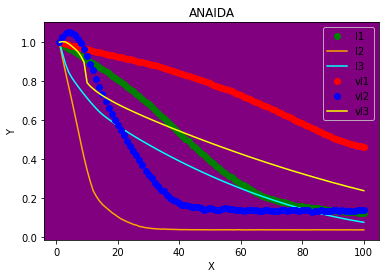

In [14]:
plt.rcParams['axes.facecolor'] = 'purple'
l1 = _1.history["loss"]/np.asarray(_1.history["loss"][0])
vl1 = _1.history["val_loss"]/np.asarray(_1.history["val_loss"][0])
l2 = _2.history["loss"]/np.asarray(_2.history["loss"][0])
vl2 = _2.history["val_loss"]/np.asarray(_2.history["val_loss"][0])
l3 = _3.history["loss"]/np.asarray(_3.history["loss"][0])
vl3 = _3.history["val_loss"]/np.asarray(_3.history["val_loss"][0])
epochs = range(1, len(l1) + 1)
plt.plot(epochs, l1, "go", label="l1")
plt.plot(epochs, l2, "orange", label="l2")
plt.plot(epochs, l3, "cyan", label="l3")
plt.plot(epochs, vl1, "ro", label="vl1")
plt.plot(epochs, vl2, "bo", label="vl2")
plt.plot(epochs, vl3, "yellow", label="vl3")
plt.xlabel('X')
plt.title('ANAIDA')
plt.ylabel('Y')
plt.legend();

# 9.	 Визуализируйте весь набор данных и прогнозы трех построенных моделей для обучающей и тестовой выборок на одном рисунке (ось X – даты, ось Y – стоимость акции), подписывая оси и рисунок и создавая легенду. 


Text(0, 0.5, 'Y')

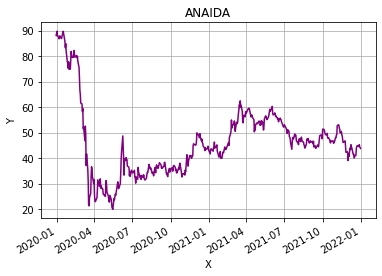

In [15]:
plt.rcParams['axes.facecolor'] = 'white'
y.plot.line(grid=True,color='purple');
plt.xlabel('X')
plt.title('ANAIDA')
plt.ylabel('Y')